In [20]:
# HIDDEN

from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [21]:
# HIDDEN

colors = Table.read_table('roulette_wheel.csv').column('Color')
pockets = make_array('0','00')
for i in np.arange(1, 37):
    pockets = np.append(pockets, str(i)) 

wheel = Table().with_columns(
    'Pocket', pockets,
    'Color', colors
)

### At the Roulette Table ###

The distributions above gave us a picture of the entire random sample. But sometimes we are just interested in one or two quantities computed based on the sample.

For example, suppose the sample consists of wins and losses in a series of bets. Then we might just be interested in the total amount of money won, rather than the entire sequence of wins and losses.

Equipped with our new knowledge about the long-run behavior of chances, let us explore a gambling game. We will simulate betting on roulette, which is popular in gambling centers such as Las Vegas and Monte Carlo.

The main randomizer in roulette in Nevada is a wheel that has 38 pockets on its rim. Two of the pockets are green, eighteen black, and eighteen red. The wheel is on a spindle, and there is a small ball on the wheel. When the wheel is spun, the ball ricochets around and finally comes to rest in one of the pockets. That is declared to be the winning pocket.

The table `wheel` represents the pockets of a Nevada roulette wheel. 

In [22]:
wheel

Pocket,Color
0,green
00,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


You are allowed to bet on several pre-specified collections of pockets displayed on a roulette table. If you bet on "red," you win if the ball comes to rest in one of the red pockets. 

The bet on red pays even money. That is, it pays 1 to 1. To understand what this means, assume you are going to bet \$1 on "red." The first thing that happens, even before the wheel is spun, is that you have to hand over your \$1. If the ball lands in a green or black pocket, you never see that dollar again. If the ball lands in a red pocket, you get your dollar back (to bring you back to even), plus another \$1 in winnings.

The function `red_winnings` takes a color as its argument and returns 1 if the color is red. For all other colors it returns -1. We apply `red_winnings` to the `Color` column of `wheel` to get a new table `bets` that shows the net gain on each pocket if you bet \$1 on red.

In [23]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [24]:
bets = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
bets

Pocket,Color,Winnings: Red
0,green,-1
00,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


Suppose you decide to repeatedly bet \$1 on red, on 200 separate spins of the wheel. How much money will you make? 

Here is a simulation of one set of 200 spins. The table `spins` consists of the results of all 200 bets. Your net gain is the sum of all the +1's and -1's in the `Winnings: Red` column of `spins`.

In [191]:
spins = bets.sample(200)
spins.column('Winnings: Red').sum()

-8

Run the cell a few times. Sometimes your net gain is positive, but more often it seems to be negative. To repeat the simulation many times and draw an empirical histogram of the results, we can use a `for` loop. We have chosen 5,000 repetitions here, but you can change that when you run the cell.

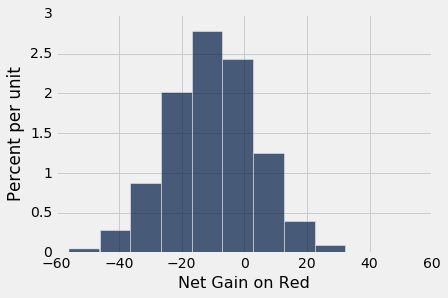

In [12]:
n = 200
N = 5000

net_gain = make_array()

for i in np.arange(N):
    spins = bets.sample(n)
    new_net_gain = spins.column('Winnings: Red').sum()
    net_gain = np.append(net_gain, new_net_gain)

Table().with_column('Net Gain on Red', net_gain).hist()

Notice the position of 0 on the horizontal axis. That's where you break even. How do you like your chances of making money by using this gambling scheme?

If the bet on red isn't appealing, maybe it's worth trying a different bet. A 'split' is a bet on two adjacent numbers on the roulette table, such as 0 and 00. The split pays 17 to 1. 

The function `split_winnings` takes a pocket as its argument and returns 17 if the pocket is either 0 or 00. For all other pockets it returns -1.

The table `bets` is now augmented by each pocket's winnings on the 0/00 split.

In [26]:
def split_winnings(pocket):
    if pocket == '0':
        return 17
    elif pocket == '00':
        return 17
    else:
        return -1

In [27]:
bets = wheel.with_columns(
    'Winnings: Red', wheel.apply(red_winnings, 'Color'),
    'Winnings: Split', wheel.apply(split_winnings, 'Pocket')
    )
bets

Pocket,Color,Winnings: Red,Winnings: Split
0,green,-1,17
00,green,-1,17
1,red,1,-1
2,black,-1,-1
3,red,1,-1
4,black,-1,-1
5,red,1,-1
6,black,-1,-1
7,red,1,-1
8,black,-1,-1


The code below simulates the results of both bets – on red and on the 0/00 split – on 200 spins of the wheel. The code is the same as in the previous simulation, apart from the addition of the lines for the split.

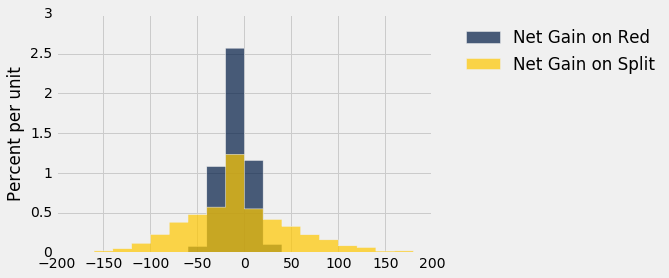

In [15]:
n = 200
N = 5000

net_gain_red = make_array()
net_gain_split = make_array()

for i in np.arange(N):
    spins = bets.sample(n)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)
    new_net_gain_split = spins.column('Winnings: Split').sum()
    net_gain_split = np.append(net_gain_split, new_net_gain_split)

Table().with_columns(
    'Net Gain on Red', net_gain_red,
    'Net Gain on Split', net_gain_split
    ).hist(bins=np.arange(-200, 200, 20))

The position of 0 on the horizontal axis shows that you are more likely to lose money than to make money, regardless of which bet you choose. In both histograms, less than 50% of the area is to the right of 0.

However, the chance of making money is larger for the split bet, as is the chance of making more than \$50. The gold histogram has plenty of area to the right of \$50, whereas the blue histogram has almost none. So should you bet on the split instead?

That depends on how much risk you are willing to take, because the histograms also show that you are more likely to *lose* more than \$50 if you bet on the split than if you bet on red. 

All bets at the roulette table have the same expected net loss per dollar bet (except the line bet, which is worse). But the returns on some bets are more variable than on others. You can go for the big bucks by choosing those bets, as long as you are prepared for the possibility of losing big.